# Models of Word2Vec 

# Learning how to use:

## Gensim Tutorial with Wikipedia article

### Creating Corpus

In [70]:
import bs4 as bs  
import urllib.request  
import re  

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')  
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:  
    article_text += p.text

In [71]:
print(type(article), "\n", 
      article[:100])

<class 'bytes'> 
 b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title'


In [72]:
print(type(parsed_article), "\n",
      parsed_article.find("title")) #html page


<class 'bs4.BeautifulSoup'> 
 <title>Artificial intelligence - Wikipedia</title>


In [73]:
print(type(article_text), "\n",
      article_text[:100])

<class 'str'> 
 
In computer science,  artificial intelligence (AI), sometimes called machine intelligence, is intel


### Preprocessing

In [5]:
# Cleaing the text
processed_article = article_text.lower()  
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )  
processed_article = re.sub(r'\s+', ' ', processed_article)

In [74]:
processed_article[:100]

' in computer science artificial intelligence ai sometimes called machine intelligence is intelligenc'

In [75]:
import spacy

In [76]:
nlp = spacy.load('en')

In [77]:
doc = nlp(processed_article)
for i, token in enumerate(doc.sents):
    if i< 10:
        print('-->Sentence %d: %s' % (i, token.text[:500]))
    else:
        break

-->Sentence 0:  in computer science artificial intelligence ai sometimes called machine intelligence is intelligence demonstrated by machines in contrast to the natural intelligence displayed by humans colloquially the term artificial intelligence is used to describe machines computers that mimic cognitive functions that humans associate with other human minds such as learning and problem solving as machines become increasingly capable tasks considered to require intelligence are often removed from the definit
-->Sentence 1: ai has elements from cognitive and emotional intelligence understanding human emotions in addition to cognitive elements and considering them in their decision making humanized
-->Sentence 2: ai shows characteristics of all types of competencies
-->Sentence 3: i e cognitive emotional and social intelligence is able to be self conscious and is self aware in interactions with others artificial intelligence was founded as an academic discipline in and in the years sin

In [78]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [79]:
print(spacy_stopwords)

{'you', 'became', 'ever', 'more', 'down', 'in', 'used', 'least', 'were', 'per', 'will', 'all', 'cannot', 'last', 'whole', 'give', 'then', 'through', '‘m', 'across', 'already', 'anyone', 'hereafter', 'and', 'made', 'or', 'well', 'much', "'ve", 'go', 'beforehand', 'whom', 'less', 'why', 'otherwise', 'the', 'yourself', 'still', 'fifteen', 'they', 'perhaps', '’ll', 'make', 're', 'seeming', 'throughout', 'an', 'she', 'whoever', '‘ve', 'myself', 'have', 'might', 'bottom', 'during', 'others', 'via', 'three', 'must', 'really', 'if', 'keep', 'that', 'too', 'am', 'does', 'always', 'done', 'one', 'very', 'nowhere', 'thereupon', 'forty', '’m', 'them', 'had', 'whereafter', 'therefore', 'yours', 'mostly', 'themselves', 'serious', '‘s', 'above', 'somehow', 'unless', 'yet', 'four', 'however', 'those', 'this', 'between', 'empty', 'her', 'various', 'my', 'ten', 'anywhere', 'often', 'which', 'of', 'besides', 'neither', 'herself', 'side', 'whatever', "'re", 'against', 'amount', 'himself', 'can', 'five', '

In [80]:
all_words = [token for token in doc.sents]

In [81]:
all_words[0][2].is_stop

False

In [82]:
for i in range(len(all_words)):
    # if it's not a stop word or punctuation mark, add it to our article!
    all_words[i] = [w.lemma_ for w in all_words[i] if not w.is_stop]

In [83]:
print(all_words[:3]) #list of lists

[[' ', 'computer', 'science', 'artificial', 'intelligence', 'ai', 'call', 'machine', 'intelligence', 'intelligence', 'demonstrate', 'machine', 'contrast', 'natural', 'intelligence', 'display', 'human', 'colloquially', 'term', 'artificial', 'intelligence', 'describe', 'machine', 'computer', 'mimic', 'cognitive', 'function', 'human', 'associate', 'human', 'mind', 'learning', 'problem', 'solve', 'machine', 'increasingly', 'capable', 'task', 'consider', 'require', 'intelligence', 'remove', 'definition', 'ai', 'phenomenon', 'know', 'ai', 'effect', 'quip', 'tesler', 's', 'theorem', 'say', 'ai', 'hasn', 't', 'instance', 'optical', 'character', 'recognition', 'frequently', 'exclude', 'thing', 'consider', 'ai', 'have', 'routine', 'technology', 'modern', 'machine', 'capability', 'generally', 'classify', 'ai', 'include', 'successfully', 'understand', 'human', 'speech', 'compete', 'high', 'level', 'strategic', 'game', 'system', 'chess', 'autonomously', 'operate', 'car', 'intelligent', 'route', 'co

### Creating Word2Vec Model

In [84]:
from gensim.models import Word2Vec

word2vec = Word2Vec(all_words, min_count=2) 

In [85]:
vocabulary = word2vec.wv.vocab  
print(len(vocabulary))
print(str(vocabulary)[:1000]) 

1072
{'computer': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a7f0>, 'science': <gensim.models.keyedvectors.Vocab object at 0x7f040d33ad30>, 'artificial': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a4e0>, 'intelligence': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a400>, 'ai': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a160>, 'call': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a4a8>, 'machine': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a278>, 'demonstrate': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a978>, 'contrast': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a470>, 'natural': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a2b0>, 'display': <gensim.models.keyedvectors.Vocab object at 0x7f040d33a5c0>, 'human': <gensim.models.keyedvectors.Vocab object at 0x7f04a0102208>, 'term': <gensim.models.keyedvectors.Vocab object at 0x7f04a01028d0>, 'describe': <gensim.models.keyedvectors.Vocab object at 0

### Model Analysis

In [86]:
v1 = word2vec.wv['artificial']   #vector for the word

In [87]:
v1

array([-9.97054158e-04, -5.67443110e-03,  4.73376596e-03,  6.46916684e-03,
        3.42766615e-03,  1.05634881e-02, -5.17138978e-03, -1.84900395e-03,
        3.99134308e-03, -3.82927654e-04,  4.67345526e-04,  2.91405828e-04,
       -5.51757123e-03, -6.96126546e-04,  1.07292354e-03, -5.95043786e-03,
       -3.81669123e-03,  5.33969235e-03,  5.14143938e-03,  6.79642102e-03,
        3.02482303e-03, -5.10393828e-03, -6.93727809e-04,  8.47232994e-03,
        1.18590484e-03,  1.10257305e-02,  2.15685368e-03,  4.23949026e-03,
       -4.51241992e-03, -1.77178264e-03,  6.84722140e-03,  5.79950213e-03,
        7.85147597e-04,  4.78796847e-03,  6.70471834e-03,  7.12968176e-03,
       -4.20010928e-03, -4.94495034e-03,  4.10841731e-03, -2.99831643e-03,
       -9.86234169e-04, -3.89020517e-03, -4.64740954e-03,  3.43898707e-03,
       -5.36990585e-03,  9.63625032e-03, -3.16595705e-03, -4.42175660e-03,
       -6.91471808e-03, -2.94099608e-03, -9.93952737e-04, -1.26874400e-03,
       -1.48194912e-03, -

In [88]:
sim_words = word2vec.wv.most_similar('intelligence', topn=20)  

In [89]:
sim_words

[('human', 0.7556136250495911),
 ('algorithm', 0.7451893091201782),
 ('risk', 0.7352930307388306),
 ('robot', 0.7122504711151123),
 ('ai', 0.7114468216896057),
 ('machine', 0.7037357687950134),
 ('problem', 0.6899410486221313),
 ('application', 0.6875265836715698),
 ('network', 0.6761336922645569),
 ('artificial', 0.6699583530426025),
 ('system', 0.6614025235176086),
 ('datum', 0.6601080894470215),
 ('neural', 0.6557859182357788),
 ('job', 0.6550028920173645),
 ('know', 0.6470203399658203),
 ('goal', 0.6362985372543335),
 ('research', 0.6319102048873901),
 ('agent', 0.6308556795120239),
 ('mind', 0.6254598498344421),
 ('example', 0.6252025365829468)]

# Trying to use the previous model with reddit data

* Note: If you disable ner and parser, your code beacames 5 times faster

In [460]:
import pandas as pd
import re
from gensim.models import Word2Vec
import gensim
import spacy
nlp = spacy.load('en')

In [444]:
df = pd.read_csv("./data/reddit/cm/FeMRA_comments.csv")

In [445]:
serie = df.Comment

In [446]:
serie.head()

0           Hello.
1               Hi
2    YAY! Content!
3          Howdy! 
4        [deleted]
Name: Comment, dtype: object

In [447]:
serie.shape

(2099,)

In [448]:
serie = serie[serie != '[deleted]']
serie.shape

(2012,)

In [449]:
my_stop_words = [u'say', u'\s', u'Mr', u'be', u'said', u'says', u'saying', u's', u'’s', u'\n\n',
                 u' ', u's', u'\n', u't']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [450]:
stl= pd.Series.tolist(serie)

In [461]:
%%time
texts, article, skl_texts = [], [], []
for pre_comment in stl:
    #if "www" in pre_comment: 
    #    continue
    comment = pre_comment.lower()  
    #comment = re.sub('[^a-zA-Z]', ' ', comment)  
    #comment = re.sub(r'\s+', ' ', comment)
    try:
        doc = nlp(comment)
    except:
        continue
    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article!
        if not w.is_stop or not w.is_punct:
            # we add the lematized version of the word
            article.append(w.lemma_)
        # assume each comment as a document
        if w.text == doc[-1].text:
            skl_texts.append(' '.join(article))
            texts.append(article)
            article = []

CPU times: user 1min 7s, sys: 481 ms, total: 1min 7s
Wall time: 38.4 s


In [434]:
texts[:6]

[['hello', '.'],
 ['hi'],
 ['yay', '!'],
 ['content', '!'],
 ['howdy', '!'],
 ['sound',
  'great',
  '.',
  '"',
  'the',
  'red',
  'pill',
  '"',
  'would',
  'a',
  'perfect',
  'name',
  'for',
  'this']]

In [435]:
bigram = gensim.models.Phrases(texts)

INFO - 20:42:24: collecting all words and their counts
INFO - 20:42:24: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 20:42:24: collected 72197 word types from a corpus of 190030 words (unigram + bigrams) and 7451 sentences
INFO - 20:42:24: using 72197 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [436]:
texts = [bigram[line] for line in texts]

In [437]:
word2vec = Word2Vec(texts, min_count=2) 

INFO - 20:42:27: collecting all words and their counts
INFO - 20:42:27: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 20:42:27: collected 9249 word types from a corpus of 182412 raw words and 7451 sentences
INFO - 20:42:27: Loading a fresh vocabulary
INFO - 20:42:27: effective_min_count=2 retains 5187 unique words (56% of original 9249, drops 4062)
INFO - 20:42:27: effective_min_count=2 leaves 178350 word corpus (97% of original 182412, drops 4062)
INFO - 20:42:27: deleting the raw counts dictionary of 9249 items
INFO - 20:42:27: sample=0.001 downsamples 49 most-common words
INFO - 20:42:27: downsampling leaves estimated 113318 word corpus (63.5% of prior 178350)
INFO - 20:42:27: estimated required memory for 5187 words and 100 dimensions: 6743100 bytes
INFO - 20:42:27: resetting layer weights
INFO - 20:42:27: training model with 3 workers on 5187 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
INFO - 20:42:27: worker thread fini

In [438]:
vocabulary = word2vec.wv.vocab  
print(len(vocabulary))
print(str(vocabulary)[:500])

5187
{'hello': <gensim.models.keyedvectors.Vocab object at 0x7f03edbeb710>, '.': <gensim.models.keyedvectors.Vocab object at 0x7f03eef3ac88>, 'hi': <gensim.models.keyedvectors.Vocab object at 0x7f03eef3ad30>, 'yay': <gensim.models.keyedvectors.Vocab object at 0x7f03eef3ac50>, '!': <gensim.models.keyedvectors.Vocab object at 0x7f03eef3ab70>, 'content': <gensim.models.keyedvectors.Vocab object at 0x7f03eef3acf8>, 'sound': <gensim.models.keyedvectors.Vocab object at 0x7f03eef3add8>, 'great': <gensim.mod


In [439]:
v1 = word2vec.wv['men']   #vector for the word
v1

array([-0.0502969 , -0.05472563, -0.09997213,  0.03597944, -0.04375872,
       -0.05938289,  0.07161834, -0.15755245, -0.09445828,  0.05766353,
       -0.1019444 , -0.03682834, -0.00787158, -0.0574638 ,  0.0507779 ,
       -0.07349428,  0.05149293, -0.0153074 ,  0.03948465,  0.04562663,
       -0.1011766 , -0.07236286, -0.18862838,  0.03507818, -0.01514349,
       -0.06019514, -0.12121388,  0.05983423, -0.07824365,  0.04473707,
       -0.0501647 ,  0.04446527,  0.17864989, -0.21898144, -0.09700459,
       -0.03376517,  0.01493186,  0.06462295,  0.08818126, -0.11598817,
        0.02346403, -0.04456222, -0.02568737, -0.02751389,  0.07956627,
       -0.02174798,  0.00509575,  0.13090359, -0.07021646,  0.07782699,
        0.06448198, -0.09240344, -0.01247212,  0.16154248,  0.05126292,
       -0.02598712, -0.07864497,  0.0953067 , -0.03132232,  0.03115742,
        0.14196953, -0.06028003,  0.01535689, -0.07900739, -0.08041897,
        0.1773011 ,  0.06334376, -0.0555732 , -0.03254937,  0.14

In [440]:
sim_words = word2vec.wv.most_similar('men', topn=20)  
sim_words

INFO - 20:42:35: precomputing L2-norms of word weight vectors


[('self_-', 0.9993945360183716),
 ('bullshit', 0.9993448257446289),
 ('create', 0.999342143535614),
 ('’s', 0.999341607093811),
 ('another', 0.9993298053741455),
 ('many', 0.9993183016777039),
 ('better', 0.9993162155151367),
 ('attempt_to', 0.9993036389350891),
 ('great', 0.9993008375167847),
 ('base_on', 0.9992946982383728),
 ('new', 0.9992934465408325),
 ('bring', 0.9992915987968445),
 ('essentially', 0.9992828965187073),
 ('marriage', 0.9992827773094177),
 ('certain', 0.9992818236351013),
 ('today', 0.9992729425430298),
 ('contribute', 0.9992728233337402),
 ('come_from', 0.9992711544036865),
 ('base', 0.9992627501487732),
 ('difference', 0.9992618560791016)]

In [441]:
sim_words = word2vec.wv.most_similar('woman', topn=20)  
sim_words

[('man', 0.9981147646903992),
 ('nature', 0.9957152605056763),
 ('provision', 0.9954695701599121),
 ('one', 0.9953712224960327),
 ('line', 0.995339035987854),
 ('view', 0.9952353239059448),
 ('number', 0.9952041506767273),
 ('centre', 0.995201587677002),
 ('other', 0.9950053691864014),
 ('place', 0.9949823617935181),
 ('interest', 0.9949676394462585),
 ('hypoagency', 0.9948750138282776),
 ('destruction', 0.9948247671127319),
 ('manipulation', 0.9947408437728882),
 ('crime', 0.9947367906570435),
 ('gang', 0.9947317838668823),
 ('over', 0.9947237968444824),
 ('wealth', 0.9946460723876953),
 ('low', 0.9946157932281494),
 ('world', 0.994604229927063)]

In [442]:
sim_words = word2vec.wv.most_similar('rape', topn=20)  
sim_words

[('due_to', 0.9997522830963135),
 ('rather_than', 0.999733567237854),
 ('follow', 0.9997286200523376),
 ('behavior', 0.9997278451919556),
 ('regard', 0.9997208118438721),
 ('quote', 0.9997186660766602),
 ('masculine', 0.999717116355896),
 ('state', 0.9997075200080872),
 ('into', 0.9997029304504395),
 ('action', 0.9997023344039917),
 ('conservative', 0.9996956586837769),
 ('liberal', 0.9996950626373291),
 ('risk', 0.9996812343597412),
 ('example', 0.9996806979179382),
 ('brain', 0.9996720552444458),
 ('therefore', 0.9996675252914429),
 ('a_bit', 0.9996662139892578),
 ('year', 0.9996643662452698),
 ('mangina', 0.9996510148048401),
 ('long', 0.9996464252471924)]

### Other cleaner way

In [166]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [462]:
df = pd.read_csv("./data/reddit/cm/FeMRA_comments.csv")

In [463]:
df.head()

,ID,Comment,Author,Score,Parent id,Publish Date
0,c5k0m3w,Hello.,AgentmraOrangemrm,10,t3_x83uj,2012-07-26 23:03:21
1,c5k0nup,Hi,MaunaLoona,9,t3_x83uj,2012-07-26 23:06:36
2,c5k1cvp,YAY! Content!,MrStonedOne,-2,t3_x86d8,2012-07-26 23:51:55
3,c5k1di0,Howdy!,girlwriteswhat,8,t3_x83uj,2012-07-26 23:53:04
4,c5k2257,[deleted],[deleted],1,t3_x83uj,2012-07-27 00:38:41


In [464]:
df.isnull().sum()

ID              0
Comment         0
Author          0
Score           0
Parent id       0
Publish Date    0
dtype: int64

In [470]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [471]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['Comment'])

In [472]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.34 mins


In [485]:
df_clean = pd.DataFrame({'clean': txt})
df_clean.shape

(2099, 1)

In [482]:
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(1867, 1)

In [260]:
from gensim.models.phrases import Phrases, Phraser

In [261]:
sent = [row.split() for row in df_clean['clean']]

In [262]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 17:38:48: collecting all words and their counts
INFO - 17:38:48: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 17:38:49: PROGRESS: at sentence #10000, processed 446991 words and 285296 word types
INFO - 17:38:49: collected 340298 word types from a corpus of 545414 words (unigram + bigrams) and 12734 sentences
INFO - 17:38:49: using 340298 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [263]:
sentences = bigram[sent]

In [264]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

21872

In [351]:
sorted(word_freq, key=word_freq.get, reverse=True)[:11]

['man',
 'woman',
 'feminist',
 'think',
 'people',
 'like',
 'rape',
 'male',
 "'",
 'say',
 'thing']

In [266]:
import multiprocessing

from gensim.models import Word2Vec

In [267]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

In [268]:
w2v_model = Word2Vec(min_count=2,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [269]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 17:39:02: collecting all words and their counts
INFO - 17:39:02: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:39:04: PROGRESS: at sentence #10000, processed 443953 words, keeping 19373 word types
INFO - 17:39:04: collected 21872 word types from a corpus of 541818 raw words and 12734 sentences
INFO - 17:39:04: Loading a fresh vocabulary
INFO - 17:39:04: effective_min_count=2 retains 13184 unique words (60% of original 21872, drops 8688)
INFO - 17:39:04: effective_min_count=2 leaves 533130 word corpus (98% of original 541818, drops 8688)
INFO - 17:39:04: deleting the raw counts dictionary of 21872 items
INFO - 17:39:04: sample=6e-05 downsamples 1126 most-common words
INFO - 17:39:04: downsampling leaves estimated 275793 word corpus (51.7% of prior 533130)
INFO - 17:39:04: estimated required memory for 13184 words and 300 dimensions: 38233600 bytes
INFO - 17:39:04: resetting layer weights


Time to build vocab: 0.03 mins


In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [271]:
w2v_model.init_sims(replace=True)

INFO - 17:41:10: precomputing L2-norms of word weight vectors


In [306]:
w2v_model.wv.most_similar(positive=["man"])

[('woman', 0.8451344966888428),
 ('structurally', 0.6811049580574036),
 ('victimize', 0.6680270433425903),
 ('society', 0.6596343517303467),
 ('gtwoman', 0.6468037366867065),
 ('needy', 0.6452990174293518),
 ('escape', 0.6452826261520386),
 ('gtthey', 0.641480028629303),
 ('supposedly', 0.6412408947944641),
 ('vulnerable', 0.6405637264251709)]

In [274]:
w2v_model.wv.most_similar(positive=["woman"])

[('man', 0.8451343774795532),
 ('gtwoman', 0.703230619430542),
 ('equally', 0.6597973108291626),
 ('structurally', 0.6581504344940186),
 ('coddle', 0.6393565535545349),
 ('minimal', 0.6377238631248474),
 ('vulnerable', 0.6370515823364258),
 ('reluctance', 0.6368145942687988),
 ('victimize', 0.6361147165298462),
 ('gtthey', 0.6333913207054138)]

In [307]:
w2v_model.wv.most_similar(positive=["feminist"])

[('establishment', 0.7919732332229614),
 ('sinister', 0.7701532244682312),
 ('oppose', 0.7701259255409241),
 ('follower', 0.7695099115371704),
 ('ideologue', 0.7677175998687744),
 ('expressly', 0.762833833694458),
 ('hijack', 0.7583426237106323),
 ('extremist', 0.7562097311019897),
 ('mra', 0.7536331415176392),
 ('traditionalist', 0.7517756223678589)]

In [276]:
w2v_model.wv.most_similar(positive=["incel"])

[('flame', 0.9078064560890198),
 ('neckbeard', 0.9006756544113159),
 ('fling', 0.8919163942337036),
 ('whiny', 0.8908308148384094),
 ('hungry', 0.8809104561805725),
 ('abrasive', 0.877448558807373),
 ('vibe', 0.8757095336914062),
 ('frontpage', 0.8730295896530151),
 ('moan', 0.8716814517974854),
 ('dwelling', 0.8716166615486145)]

In [325]:
w2v_model.wv.most_similar(positive=["masculism"])

[('mensright', 0.8554102778434753),
 ('humanism', 0.842522144317627),
 ('r', 0.8385185599327087),
 ('px', 0.8229912519454956),
 ('askfeminist', 0.8118565678596497),
 ('reddit', 0.8069695234298706),
 ('egalitarianism', 0.801781415939331),
 ('sub', 0.796673595905304),
 ('subscribe', 0.7954368591308594),
 ('genderegalitarian', 0.7953689098358154)]

In [346]:
w2v_model.wv.similarity("mra", "masculism")

0.60773104

In [347]:
w2v_model.wv.similarity("mra", "mgtow")

0.65626246

In [344]:
w2v_model.wv.similarity("mra", "incel")

0.5404325

In [286]:
w2v_model.wv.similarity("incel", "mgtow")

0.7815511

In [384]:
w2v_model.wv.similarity("redpill", "mgtow")

0.83452

In [385]:
w2v_model.wv.similarity("redpill", "mra")

0.7257017

In [280]:
w2v_model.wv.similarity("mra", "house")

-0.059593476

In [383]:
w2v_model.wv.doesnt_match(['incel', 'mgtow', 'mra', 'mensright', 'redpill'])

'mensright'

In [348]:
w2v_model.wv.most_similar(positive=["feminist", "men"], negative=["woman"], topn=5)

[('extremist', 0.7033339738845825),
 ('activist', 0.6940164566040039),
 ('men_issue', 0.6603909134864807),
 ('activism', 0.6560803651809692),
 ('slander', 0.6472089290618896)]

In [337]:
w2v_model.wv.most_similar(positive=["masculism", "woman"], negative=["feminism"], topn=5)

[('man', 0.6012845039367676),
 ('intrinsically', 0.521870493888855),
 ('emphasize', 0.516203761100769),
 ('objectionable', 0.511768102645874),
 ('exceptionally', 0.5094343423843384)]

In [339]:
w2v_model.wv.most_similar(positive=["man", "feminism"], negative=["mra"], topn=5)

[('woman', 0.6943067312240601),
 ('society', 0.629139244556427),
 ('supposedly', 0.6206615567207336),
 ('detrimental', 0.6137889623641968),
 ('patriarchal', 0.6092135310173035)]

### t-SNE visualizations:

In [349]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [371]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

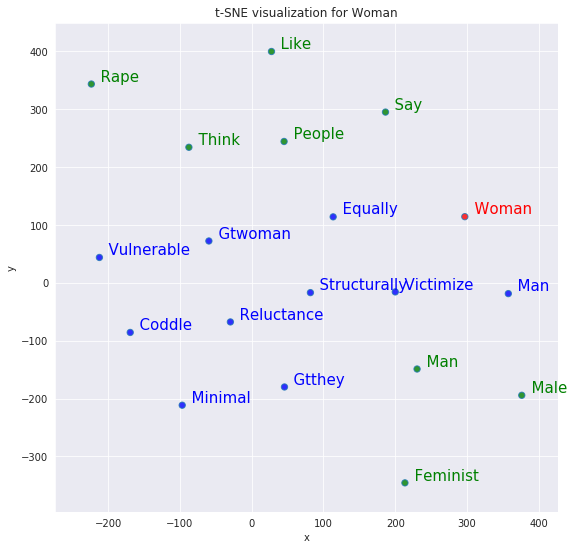

In [372]:
tsnescatterplot(w2v_model, 'woman', ['man', 'feminist', 'think', 'people', 'like', 'rape', 'male', 'say',])

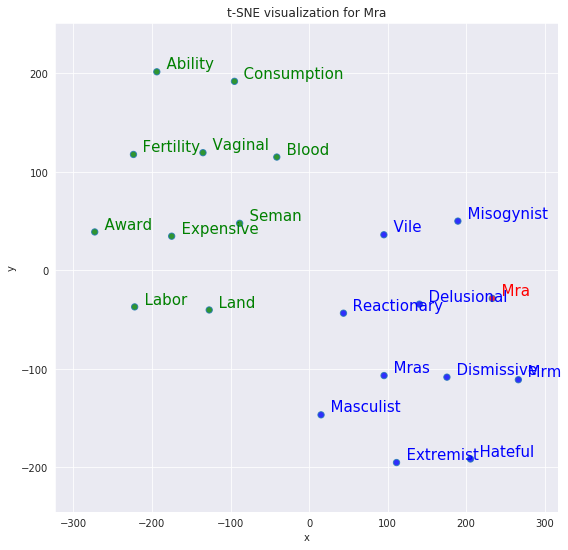

In [375]:
tsnescatterplot(w2v_model, 'mra', [i[0] for i in w2v_model.wv.most_similar(negative=["mra"])])

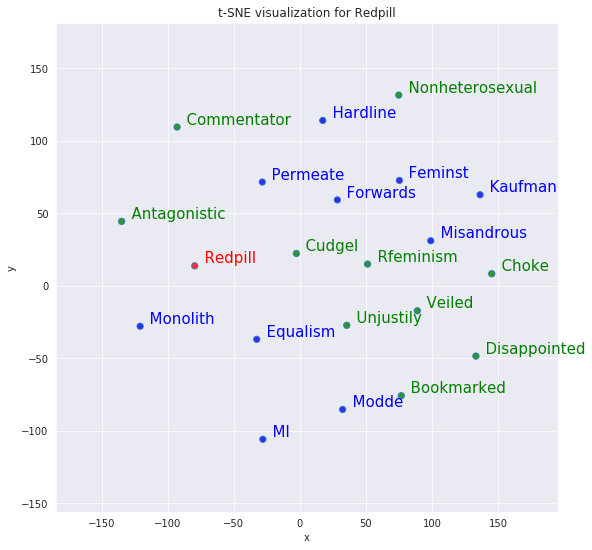

In [386]:
tsnescatterplot(w2v_model, "redpill", [t[0] for t in w2v_model.wv.most_similar(positive=["redpill"], topn=20)][10:])

In [396]:
df_clean.head()

,clean
0,important realize attention get pay female vic...
1,rarely bring acceptable woman skin situation o...
2,wish subreddit good luck hope place discuss co...
3,good point man sexualizable right dare
4,think important point man rape receive support...


In [410]:
df_clean.to_pickle("df_clean.csv")

In [411]:
df_clean2 = pd.read_pickle("df_clean.csv")

### Try with another dataset

In [9]:
import pandas as pd
import pickle
from gensim.models.phrases import Phrases, Phraser

In [20]:
from collections import defaultdict  # For word frequency

In [7]:
with open("./../topic_model/texts.txt", "rb") as fp:   # Unpickling
    texts = pickle.load(fp)

In [29]:
len(texts)

4207846

In [13]:
phrases = Phrases(texts, min_count=30, progress_per=10000)

In [15]:
bigram = Phraser(phrases)

In [18]:
sentences = bigram[texts]

In [21]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

404114

In [22]:
sorted(word_freq, key=word_freq.get, reverse=True)[:11]

['woman',
 'like',
 'man',
 ' ',
 'think',
 'people',
 'want',
 'know',
 'thing',
 'guy',
 'gt']

In [23]:
import multiprocessing

from gensim.models import Word2Vec

In [25]:
cores = multiprocessing.cpu_count()
cores

16

In [26]:
w2v_model = Word2Vec(min_count=2,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [27]:
%%time
w2v_model.build_vocab(sentences, progress_per=10000)

CPU times: user 3min 26s, sys: 2.04 s, total: 3min 28s
Wall time: 3min 28s


In [28]:
%%time
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

CPU times: user 5h 33s, sys: 7min 55s, total: 5h 8min 29s
Wall time: 2h 12min 50s


(562916556, 966331080)

In [30]:
w2v_model.init_sims(replace=True)

In [31]:
w2v_model.wv.most_similar(positive=["man"])

[('woman', 0.9775229096412659),
 ('mean', 0.884340763092041),
 ('want', 0.872310221195221),
 ('people', 0.8648477792739868),
 ('one', 0.8593289256095886),
 ('way', 0.8533031940460205),
 ('think', 0.8531776666641235),
 ('gt', 0.8514270186424255),
 (' ', 0.8486940860748291),
 ('yes', 0.844106912612915)]

In [33]:
w2v_model.wv.most_similar(positive=["woman"])

[('man', 0.9775227308273315),
 ('mean', 0.9032737016677856),
 ('want', 0.892600953578949),
 ('people', 0.8825752139091492),
 ('think', 0.8764145374298096),
 ('gt', 0.8668755292892456),
 ('way', 0.8668233752250671),
 (' ', 0.8656284809112549),
 ('not', 0.8626813888549805),
 ('obviously', 0.8606929779052734)]

In [32]:
w2v_model.wv.most_similar(positive=["mgtow"])

[('MGTOW', 0.6898900270462036),
 ('incel', 0.6543096899986267),
 ('subreddit', 0.5888413190841675),
 ('sub', 0.587133526802063),
 ('trp', 0.5793638825416565),
 ('mra', 0.5622263550758362),
 ('terper', 0.5559073686599731),
 ('redpill', 0.5545810461044312),
 ('redpiller', 0.5512914061546326),
 ('TRP', 0.5505342483520508)]

In [34]:
w2v_model.wv.most_similar(positive=["incel"])

[('trp', 0.7767606973648071),
 ('TRP', 0.7712908983230591),
 ('sub', 0.7480782270431519),
 ('terper', 0.7330741882324219),
 ('hate', 0.7224292755126953),
 ('subreddit', 0.7140870690345764),
 ('redpiller', 0.7066009044647217),
 ('people', 0.7057236433029175),
 ('red_pill', 0.698564350605011),
 ('MGTOW', 0.6967755556106567)]

In [35]:
w2v_model.wv.most_similar(positive=["rape"])

[('rapist', 0.7920323610305786),
 ('victim', 0.7875912189483643),
 ('abuse', 0.7510271072387695),
 ('sexual_assault', 0.739216685295105),
 ('assault', 0.7248852252960205),
 ('case', 0.7139438390731812),
 ('murder', 0.712947428226471),
 ('happen', 0.7053604125976562),
 ('yes', 0.6739351153373718),
 ('crime', 0.6722428202629089)]

In [39]:
w2v_model.wv.most_similar(positive=["mra"])

[('MRA', 0.6653481721878052),
 ('feminist', 0.6348302364349365),
 ('MRAs', 0.6328592300415039),
 ('feminism', 0.6163703203201294),
 ('mgtow', 0.562226414680481),
 ('movement', 0.556784987449646),
 ('incel', 0.5539023876190186),
 ('MRM', 0.5510486960411072),
 ('MGTOW', 0.5494260787963867),
 ('anti_feminist', 0.5473901629447937)]

In [40]:
w2v_model.wv.most_similar(positive=["masculism"])

[('gasthekike', 0.4445052742958069),
 ('menright', 0.43154436349868774),
 ('fixintheplanet', 0.4036019444465637),
 ('nonsenese', 0.39230477809906006),
 ('theconspiratardpill', 0.3891037404537201),
 ('rights4man', 0.3878043293952942),
 ('exmuslim', 0.3823767900466919),
 ('madmax', 0.3811313807964325),
 ('WhiteRights', 0.3792158365249634),
 ('athiesm', 0.3718172311782837)]

In [43]:
w2v_model.wv.most_similar(positive=["mensright", "woman"], negative=["feminism"], topn=5)

[('guy', 0.4015490412712097),
 ('regular', 0.3858480155467987),
 ('attractive', 0.3798823952674866),
 ('attract', 0.3789485991001129),
 ('find', 0.37012991309165955)]

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ["r"]

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word], topn=5)
    
    # adds the vector for each of the closest words to the array
    #colors = ["#0A0A0A", "#00AA00", "#0000AA", "#AA0A0A", "#B000B0"]
    #colors2 = [color.replace("0", "6") for color in colors]
    
    #color_list.extend(colors)
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        arrays = np.append(arrays, wrd_vector, axis=0)
        color_list.append("blue")
    
    # adds the vector for each of the words from list_names to the array
    count = 0;
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("green")   #colors2[int(count/3)])
        arrays = np.append(arrays, wrd_vector, axis=0)
        
        count += 1
        
    # Reduces the dimensionality from 300 to 16 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [3]:
def tsne3_of_5(model, primary_word):
    top3s = []
    top5 = w2v_model.wv.most_similar(positive=[primary_word], topn=3)
    for child_word in top5:
        top3s.extend(t[0] for t in w2v_model.wv.most_similar(positive=[child_word], topn=5))

    tsnescatterplot(model, primary_word, list(dict.fromkeys(top3s)))

NameError: name 'w2v_model' is not defined

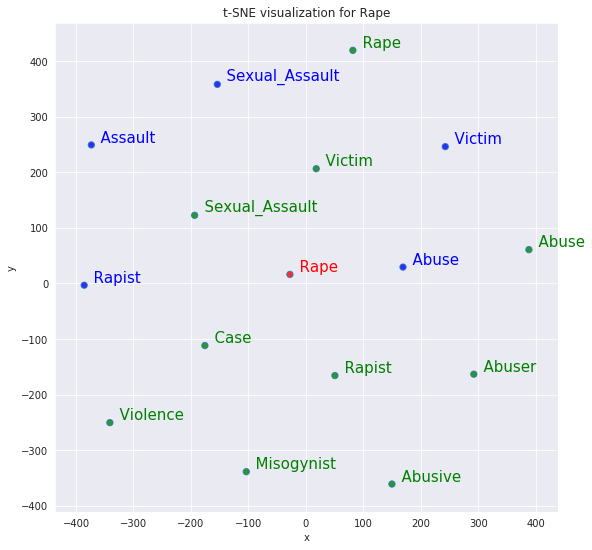

In [75]:
tsne3_of_5(w2v_model, "rape")

In [68]:
w2v_model.wv.most_similar(positive=['man'], topn=5)

[('woman', 0.9775229096412659),
 ('mean', 0.884340763092041),
 ('want', 0.872310221195221),
 ('people', 0.8648477792739868),
 ('one', 0.8593289256095886)]